<a href="https://colab.research.google.com/github/elimeyer1/ML_4105/blob/main/Homework_6_Question_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import time
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer


In [ ]:
breast = load_breast_cancer()
x=breast.data
y=breast.target


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)

In [ ]:
x_train = torch.tensor(x_train, dtype=torch.float32)
x_val = torch.tensor(x_val, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32)

In [ ]:
class CancerNeuralNetwork(nn.Module):
    def __init__(self, input_dim, hidden_nodes=8):
        super(CancerNeuralNetwork, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, hidden_nodes),
            nn.ReLU(),
            nn.Linear(hidden_nodes, 1)
        )

    def forward(self, x):
        return self.network(x)

In [ ]:
epochs = 500
learning_rate = 0.001
hidden_nodes = 32

In [ ]:
model = CancerNeuralNetwork(
      input_dim=x_train.shape[1],
      hidden_nodes=hidden_nodes
    )
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [ ]:
start_time = time.time()

In [ ]:
train_losses = []
for epoch in range(epochs):

    outputs = model(x_train)
    loss = criterion(outputs, y_train)


    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    train_losses.append(loss.item())


    if epoch % 100 == 0:
        print(f"Epoch [{epoch}/{epochs}], Loss: {loss.item():.4f}")

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([455])) that is different to the input size (torch.Size([455, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [0/500], Loss: 10075.1289
Epoch [100/500], Loss: 26.2044
Epoch [200/500], Loss: 15.1550
Epoch [300/500], Loss: 9.3646
Epoch [400/500], Loss: 6.0159


In [ ]:
training_time = time.time() - start_time

In [ ]:
model.eval()
with torch.no_grad():
    val_predictions = model(x_val)
    val_loss = criterion(val_predictions, y_val)


    val_pred_np = val_predictions.numpy()
    val_true_np = y_val.numpy()


    mse = mean_squared_error(val_true_np, val_pred_np)
    mae = mean_absolute_error(val_true_np, val_pred_np)
    r2 = r2_score(val_true_np, val_pred_np)

print('model', model)
print('training_time', training_time)
print('final_train_loss', train_losses[-1])
print('validation_mse', mse)
print('validation_mae', mae)
print('validation_r2', r2)
print('training_losses', train_losses)

model CancerNeuralNetwork(
  (network): Sequential(
    (0): Linear(in_features=30, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=1, bias=True)
  )
)
training_time 1.1307682991027832
final_train_loss 3.83974289894104
validation_mse 2.7325654
validation_mae 0.92326194
validation_r2 -10.631974220275879
training_losses [10075.12890625, 8907.376953125, 7820.291015625, 6814.8154296875, 5891.646484375, 5048.99072265625, 4285.453125, 3598.495361328125, 2985.133056640625, 2442.7607421875, 1968.2503662109375, 1557.8367919921875, 1207.988037109375, 914.3599243164062, 673.3355712890625, 479.8446960449219, 329.0412292480469, 216.30072021484375, 136.86062622070312, 85.9326171875, 58.78089904785156, 50.67558670043945, 57.04249572753906, 73.64802551269531, 96.63201904296875, 122.76729583740234, 149.3619384765625, 174.2577362060547, 195.88241577148438, 213.18345642089844, 225.52076721191406, 232.6455078125, 234.6507568359375, 231.91409301757812, 224.894912719

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([114])) that is different to the input size (torch.Size([114, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


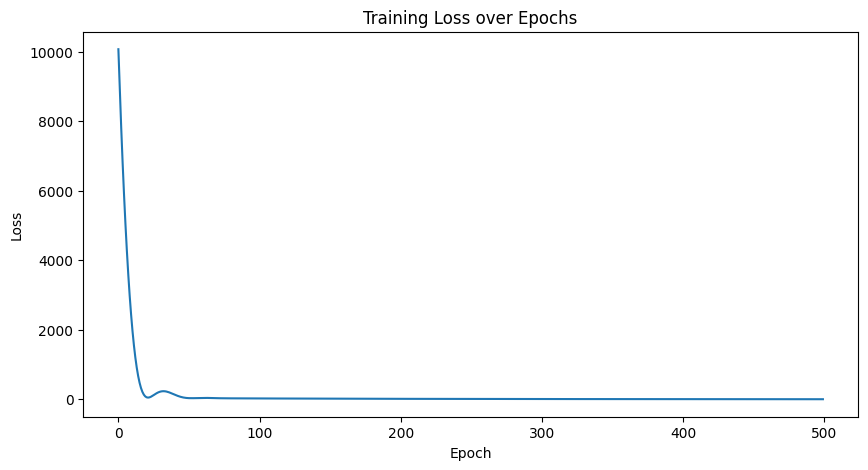

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(train_losses)
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()